In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/SMM4H 2024/SMM4H_2024_Task3_Training_1800.csv')
df_dev = pd.read_csv('/content/drive/MyDrive/SMM4H 2024/SMM4H_2024_Task3_Validation_600_codalab.csv')
df_test = pd.read_csv('/content/drive/MyDrive/SMM4H 2024/SMM4H_Task3_testposts_decoy_keywords.csv')

In [3]:
df_train = df_train[:1800]
df_train = df_train.iloc[:, :4]
df_train['Classification'] = df_train['Classification'].astype(int)
df_dev['Classification']   =   df_dev['Classification'].astype(int)

In [4]:
df_train

,id,keyword,text,Classification
0,3u2w5k,run,"21/m. I want to experience young love, but I'v...",0
1,3xbury,outside,Having issues talking to a girl whom I enjoyed...,0
2,3y743u,"run, swim, climb",Need some advice for free social activities. I...,0
3,43bvs7,walk,I spoke to her today.. A few weeks ago I met ...,0
4,442ap2,outside,"How to get over Social Anxiety?. Hello, The ot...",0
...,...,...,...,...
1795,gqzye9,"pool, beach, pool",Social Anxiety: The Essentials. After looking...,3
1796,env299,"outside , outdoors",Eye contact. Being in public. I can't do it. ...,3
1797,e9bnr1s,Jogging,"If you look for the light, you will find it. I...",3
1798,qrmhbe,"walk, swimming, pool","I feel like my SA is ruining my life. Hi, I h...",3


In [5]:
df_dev

,id,keyword,text,Classification
0,fc6l72u,cruise,(1) I had SA but managed to practically eradic...,0
1,8eijpy,"runners, run , run","Anyone looking for a friend? Real friend, beh...",0
2,didnpbe,"running , golf","Breathe, darling. The purpose of dating is to...",0
3,dxe6gbb,sea,I've been overweight since 2nd grade and it a...,0
4,f5jqgbz,waves,I need this terribly. I’ve been in negative w...,0
...,...,...,...,...
595,edvs552,walk,The thought of applying for a job terrified m...,2
596,ee31pf,outside,No one will ever love me because I don't have...,2
597,eei3pz3,"outside, walk","5 or 7, I never shit outside of my house. Once...",2
598,eek8bpk,outside,"Yes, I hate eating in front of anyone I don’t...",2


In [6]:
df_test

,id,keyword,text
0,inmdrd,"outside, camp, camping","Venting about friend problems. Okay, so years ..."
1,rav4bw,"walk, outside, Park",I can’t live with the mind I was given.. Every...
2,e03jwjy,"climb, tree, beach, wildlife",The best guy at this summer job I quit was an ...
3,khd8q1,"walk, walk, jog",I think ive had SAD all my life and idk how to...
4,q9uxky,mountains,Part of me wants to live in a cottage somewhe...
...,...,...,...
1195,dt18716,"soccer, basketball, baseball, basketball, bask...",Just do it. Sports don’t require a lot of soc...
1196,nilic6,outside,I (23M) feel like going outside but i don't kn...
1197,cz24q1,"outside, walk, beach",hanging out with stoners how can you have fun...
1198,e9xd0uy,surf,"I love memes, but this sub is not the place f..."


In [7]:
print(len(df_train))
print(len(df_dev))
print(len(df_test))

1800
600
1200


In [8]:
import re
import pandas as pd
def preprocess_text(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = text.lower()
    text = re.sub(r'[@#]\w+', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df_train['text'] = df_train['text'].apply(preprocess_text)
df_dev['text'] = df_dev['text'].apply(preprocess_text)
df_test['text'] = df_test['text'].apply(preprocess_text)

In [9]:
!pip install transformers seqeval torch tqdm accelerate sentencepiece datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 26.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidi

In [10]:
print(df_train['Classification'].value_counts())
print(df_dev['Classification'].value_counts())

Classification
0    1131
2     395
1     160
3     114
Name: count, dtype: int64
Classification
0    377
2    131
1     54
3     38
Name: count, dtype: int64


In [11]:
df_train['label_1'] = (df_train['Classification'] != 0).astype(int)
df_dev['label_1']   =   (df_dev['Classification'] != 0).astype(int)

In [12]:
df_train['label_2'] = df_train['Classification']
df_dev['label_2']   =   df_dev['Classification']

In [13]:
df_train_1 = df_train.copy()
df_train_2 = df_train[df_train['label_1'] == 1]
df_dev_1 = df_dev.copy()
df_dev_2 = df_dev[df_dev['label_1'] == 1]

In [14]:
df_train_2

,id,keyword,text,Classification,label_1,label_2
1131,d3moq94,walk,do you feel like the texts that you send back ...,1,1,1
1132,d51rpnb,"outside, bike",i'm gonna do the pokemon thing to get myself t...,1,1,1
1133,d5bzg04,walk,something that work for me is to expose myself...,1,1,1
1134,d5ttkj7,run,absolutely! please encourage your son to do so...,1,1,1
1135,d6se5to,"running, run, horse, walk",i so agree its such a feel good thing for me. ...,1,1,1
...,...,...,...,...,...,...
1795,gqzye9,"pool, beach, pool",social anxiety: the essentials. after looking ...,3,1,3
1796,env299,"outside , outdoors",eye contact. being in public. i can't do it. h...,3,1,3
1797,e9bnr1s,Jogging,"if you look for the light, you will find it. i...",3,1,3
1798,qrmhbe,"walk, swimming, pool","i feel like my sa is ruining my life. hi, i ho...",3,1,3


In [15]:
print(df_train_2['label_2'].value_counts())
print(df_dev_2['label_2'].value_counts())

label_2
2    395
1    160
3    114
Name: count, dtype: int64
label_2
2    131
1     54
3     38
Name: count, dtype: int64


In [16]:
df_train_2['label_2'] -= 1
df_dev_2['label_2'] -= 1

<ipython-input-16-9ef0c6106b64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['label_2'] -= 1
<ipython-input-16-9ef0c6106b64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev_2['label_2'] -= 1


In [17]:
print(df_train_2['label_2'].value_counts())
print(df_dev_2['label_2'].value_counts())

label_2
1    395
0    160
2    114
Name: count, dtype: int64
label_2
1    131
0     54
2     38
Name: count, dtype: int64


In [18]:
df_train_2

,id,keyword,text,Classification,label_1,label_2
1131,d3moq94,walk,do you feel like the texts that you send back ...,1,1,0
1132,d51rpnb,"outside, bike",i'm gonna do the pokemon thing to get myself t...,1,1,0
1133,d5bzg04,walk,something that work for me is to expose myself...,1,1,0
1134,d5ttkj7,run,absolutely! please encourage your son to do so...,1,1,0
1135,d6se5to,"running, run, horse, walk",i so agree its such a feel good thing for me. ...,1,1,0
...,...,...,...,...,...,...
1795,gqzye9,"pool, beach, pool",social anxiety: the essentials. after looking ...,3,1,2
1796,env299,"outside , outdoors",eye contact. being in public. i can't do it. h...,3,1,2
1797,e9bnr1s,Jogging,"if you look for the light, you will find it. i...",3,1,2
1798,qrmhbe,"walk, swimming, pool","i feel like my sa is ruining my life. hi, i ho...",3,1,2


In [19]:
from datasets import load_metric
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, IntervalStrategy, TrainerCallback
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from accelerate import Accelerator
import numpy as np
import torch
import os
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.labels)
class SaveModelCallback(TrainerCallback):
    def __init__(self, output_dir):
        self.output_dir = output_dir
    def on_epoch_end(self, args, state, control, **kwargs):
        output_dir = os.path.join(self.output_dir, f"epoch_bartlarge_B_{state.epoch}")
        os.makedirs(output_dir, exist_ok=True)
        model.save_pretrained(output_dir)
        tokenizer.save_pretrained(output_dir)
texts = df_train_2['text'].tolist()
labels = df_train_2['label_2'].tolist()
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('facebook/bart-large', num_labels=3) # Adjust num_labels as per your requirement
train_dataset = TextDataset(tokenizer, texts, labels)
texts_dev = df_dev_2['text'].tolist()
labels_dev = df_dev_2['label_2'].tolist()
validation_dataset = TextDataset(tokenizer, texts_dev, labels_dev)
training_args = TrainingArguments(
    output_dir='./results_temp',
    num_train_epochs=30,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=0,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=100,
    evaluation_strategy=IntervalStrategy.EPOCH,
    save_strategy=IntervalStrategy.NO,
    load_best_model_at_end=False,
)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,  # Include validation dataset in training configuration
    callbacks=[SaveModelCallback(output_dir='./model_saves')]
)
trainer.train()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

Some weights of BartForSequenceClassification were not initialized from the model checkpoint at facebook/bart-large and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,1.056987
2,0.837100,0.851668
3,0.653300,1.163028
4,0.368700,1.596995
5,0.265200,2.074883
6,0.079800,2.479006
7,0.079800,2.699400
8,0.056900,3.030673
9,0.032900,3.091723
10,0.020000,3.027407


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file

TrainOutput(global_step=2520, training_loss=0.09569619132573337, metrics={'train_runtime': 2619.7762, 'train_samples_per_second': 7.661, 'train_steps_per_second': 0.962, 'total_flos': 2.181179740142592e+16, 'train_loss': 0.09569619132573337, 'epoch': 30.0})

In [20]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
class TextDataset(Dataset):
    def __init__(self, tokenizer, texts, labels=None):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=512)
        self.labels = labels if labels is not None else [0] * len(texts)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item
    def __len__(self):
        return len(self.encodings['input_ids'])

Evaluating:   0%|          | 0/56 [00:00<?, ?it/s]

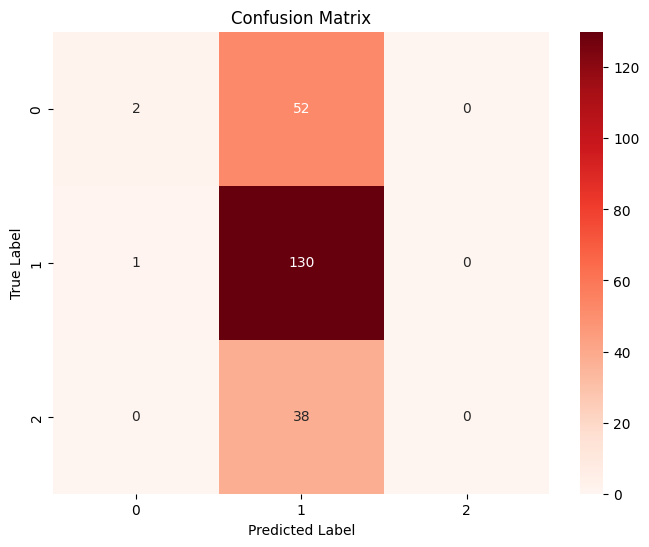

Accuracy: 0.5919282511210763
F1 Score (Class 1): 0.2703053931124107
Recall (Macro): 0.3431344830835925
Precision (Macro): 0.41919191919191917


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/model_saves/epoch_bartlarge_B_1.0')                #XXX       #THIS
model = model.to('cuda')
dev_texts = df_dev_2['text'].tolist()                                                                                   #XXX
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=4, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy(), probabilities[:,2].cpu().numpy()))
df_predictions_1 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight', 'prediction_2_weight'])        #THIS

df_dev_2.reset_index(drop=True, inplace=True)
df_predictions_1.reset_index(drop=True, inplace=True)
df_merged_1 = pd.concat([df_dev_2, df_predictions_1], axis=1)

#df_merged_1 = pd.concat([df_dev_2, df_predictions_1], axis=1)                                      #XXX                        #THIS #THIS
true_labels = df_merged_1['label_2']                                                                                                   #THIS
predicted_labels = df_merged_1['predicted_label']                                                                                    #THIS
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, average='macro')
recall_class_1 = recall_score(true_labels, predicted_labels, average='macro')
precision_class_1 = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_class_1}")
print(f"Precision (Macro): {precision_class_1}")
df_merged_1.to_csv('BartLargeB_task6_predictions_002_epoch_1.csv', index=False)

Evaluating:   0%|          | 0/56 [00:00<?, ?it/s]

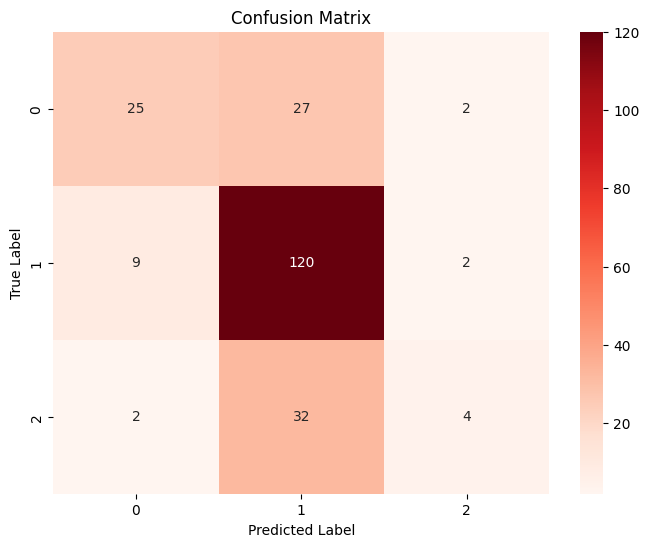

Accuracy: 0.6681614349775785
F1 Score (Class 1): 0.501220715806971
Recall (Macro): 0.49475221840294825
Precision (Macro): 0.6216118352989861


In [22]:
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/model_saves/epoch_bartlarge_B_2.0')                #XXX       #THIS
model = model.to('cuda')
dev_texts = df_dev_2['text'].tolist()                                                                                   #XXX
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=4, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy(), probabilities[:,2].cpu().numpy()))
df_predictions_2 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight', 'prediction_2_weight'])        #THIS

df_dev_2.reset_index(drop=True, inplace=True)
df_predictions_2.reset_index(drop=True, inplace=True)
df_merged_2 = pd.concat([df_dev_2, df_predictions_2], axis=1)

#df_merged_1 = pd.concat([df_dev_2, df_predictions_1], axis=1)                                      #XXX                        #THIS #THIS
true_labels = df_merged_2['label_2']                                                                                                   #THIS
predicted_labels = df_merged_2['predicted_label']                                                                                    #THIS
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, average='macro')
recall_class_1 = recall_score(true_labels, predicted_labels, average='macro')
precision_class_1 = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_class_1}")
print(f"Precision (Macro): {precision_class_1}")
df_merged_2.to_csv('BartLargeB_task6_predictions_002_epoch_2.csv', index=False)

Evaluating:   0%|          | 0/56 [00:00<?, ?it/s]

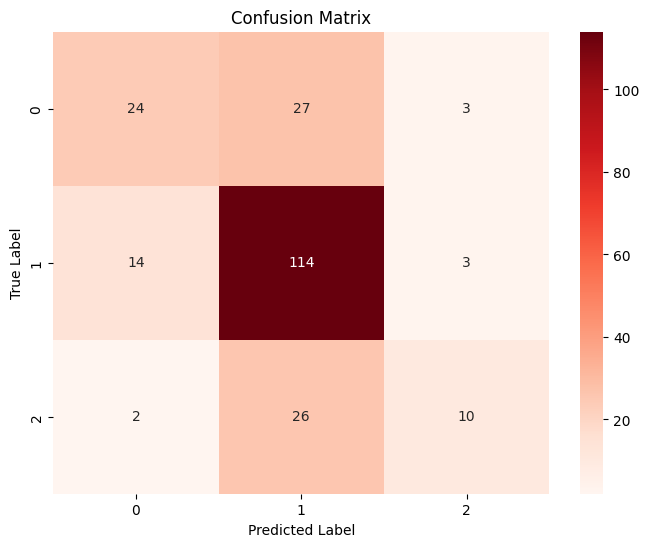

Accuracy: 0.6636771300448431
F1 Score (Class 1): 0.5487031131278836
Recall (Macro): 0.5259437822716247
Precision (Macro): 0.6358782435129741


In [23]:
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/model_saves/epoch_bartlarge_B_3.0')                #XXX       #THIS
model = model.to('cuda')
dev_texts = df_dev_2['text'].tolist()                                                                                   #XXX
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=4, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy(), probabilities[:,2].cpu().numpy()))
df_predictions_3 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight', 'prediction_2_weight'])        #THIS

df_dev_2.reset_index(drop=True, inplace=True)
df_predictions_3.reset_index(drop=True, inplace=True)
df_merged_3 = pd.concat([df_dev_2, df_predictions_3], axis=1)

#df_merged_1 = pd.concat([df_dev_2, df_predictions_1], axis=1)                                      #XXX                        #THIS #THIS
true_labels = df_merged_3['label_2']                                                                                                   #THIS
predicted_labels = df_merged_3['predicted_label']                                                                                    #THIS
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, average='macro')
recall_class_1 = recall_score(true_labels, predicted_labels, average='macro')
precision_class_1 = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_class_1}")
print(f"Precision (Macro): {precision_class_1}")
df_merged_3.to_csv('BartLargeB_task6_predictions_002_epoch_3.csv', index=False)

Evaluating:   0%|          | 0/56 [00:00<?, ?it/s]

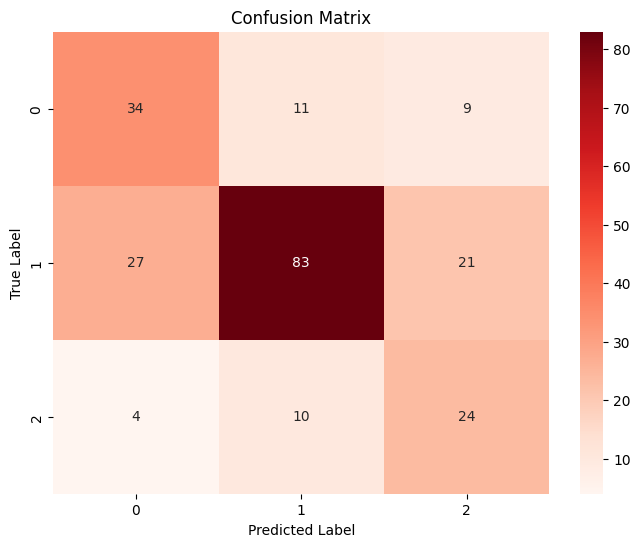

Accuracy: 0.6322869955156951
F1 Score (Class 1): 0.5998502268622526
Recall (Macro): 0.6315987877525309
Precision (Macro): 0.5885327635327636


In [24]:
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/model_saves/epoch_bartlarge_B_4.0')                #XXX       #THIS
model = model.to('cuda')
dev_texts = df_dev_2['text'].tolist()                                                                                   #XXX
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=4, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy(), probabilities[:,2].cpu().numpy()))
df_predictions_4 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight', 'prediction_2_weight'])        #THIS

df_dev_2.reset_index(drop=True, inplace=True)
df_predictions_4.reset_index(drop=True, inplace=True)
df_merged_4 = pd.concat([df_dev_2, df_predictions_4], axis=1)

#df_merged_1 = pd.concat([df_dev_2, df_predictions_1], axis=1)                                      #XXX                        #THIS #THIS
true_labels = df_merged_4['label_2']                                                                                                   #THIS
predicted_labels = df_merged_4['predicted_label']                                                                                    #THIS
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, average='macro')
recall_class_1 = recall_score(true_labels, predicted_labels, average='macro')
precision_class_1 = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_class_1}")
print(f"Precision (Macro): {precision_class_1}")
df_merged_4.to_csv('BartLargeB_task6_predictions_002_epoch_4.csv', index=False)

Evaluating:   0%|          | 0/56 [00:00<?, ?it/s]

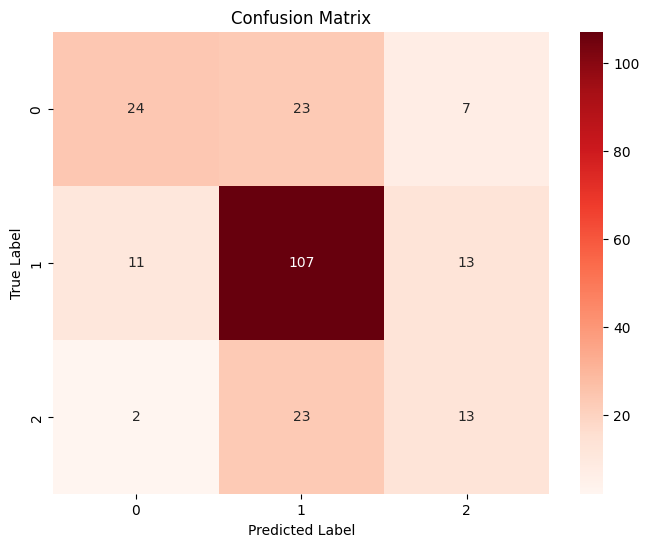

Accuracy: 0.6457399103139013
F1 Score (Class 1): 0.5490636124438941
Recall (Macro): 0.5344478669107033
Precision (Macro): 0.5806448159389336


In [25]:
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/model_saves/epoch_bartlarge_B_10.0')                #XXX       #THIS
model = model.to('cuda')
dev_texts = df_dev_2['text'].tolist()                                                                                   #XXX
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=4, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy(), probabilities[:,2].cpu().numpy()))
df_predictions_10 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight', 'prediction_2_weight'])        #THIS

df_dev_2.reset_index(drop=True, inplace=True)
df_predictions_10.reset_index(drop=True, inplace=True)
df_merged_10 = pd.concat([df_dev_2, df_predictions_10], axis=1)

#df_merged_1 = pd.concat([df_dev_2, df_predictions_1], axis=1)                                      #XXX                        #THIS #THIS
true_labels = df_merged_10['label_2']                                                                                                   #THIS
predicted_labels = df_merged_10['predicted_label']                                                                                    #THIS
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, average='macro')
recall_class_1 = recall_score(true_labels, predicted_labels, average='macro')
precision_class_1 = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_class_1}")
print(f"Precision (Macro): {precision_class_1}")
df_merged_10.to_csv('BartLargeB_task6_predictions_002_epoch_10.csv', index=False)

Evaluating:   0%|          | 0/56 [00:00<?, ?it/s]

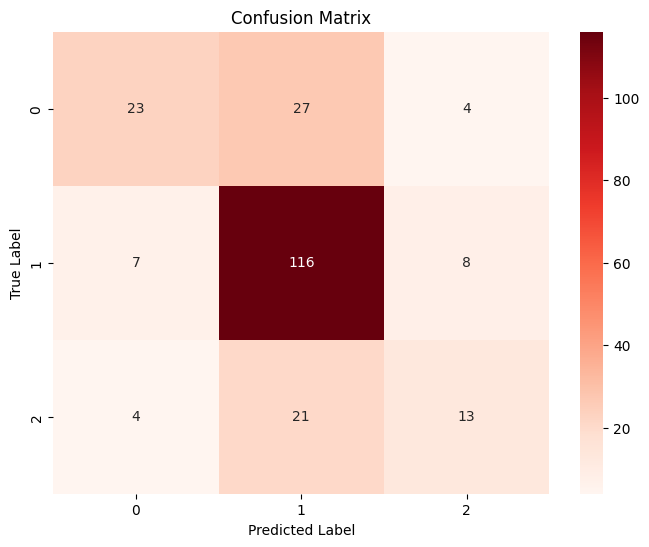

Accuracy: 0.6816143497757847
F1 Score (Class 1): 0.5739554544639291
Recall (Macro): 0.5511757907633091
Precision (Macro): 0.634595887135342


In [26]:
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/model_saves/epoch_bartlarge_B_15.0')                #XXX       #THIS
model = model.to('cuda')
dev_texts = df_dev_2['text'].tolist()                                                                                   #XXX
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=4, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy(), probabilities[:,2].cpu().numpy()))
df_predictions_15 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight', 'prediction_2_weight'])        #THIS

df_dev_2.reset_index(drop=True, inplace=True)
df_predictions_15.reset_index(drop=True, inplace=True)
df_merged_15 = pd.concat([df_dev_2, df_predictions_15], axis=1)

#df_merged_1 = pd.concat([df_dev_2, df_predictions_1], axis=1)                                      #XXX                        #THIS #THIS
true_labels = df_merged_15['label_2']                                                                                                   #THIS
predicted_labels = df_merged_15['predicted_label']                                                                                    #THIS
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, average='macro')
recall_class_1 = recall_score(true_labels, predicted_labels, average='macro')
precision_class_1 = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_class_1}")
print(f"Precision (Macro): {precision_class_1}")
df_merged_15.to_csv('BartLargeB_task6_predictions_002_epoch_15.csv', index=False)

Evaluating:   0%|          | 0/56 [00:00<?, ?it/s]

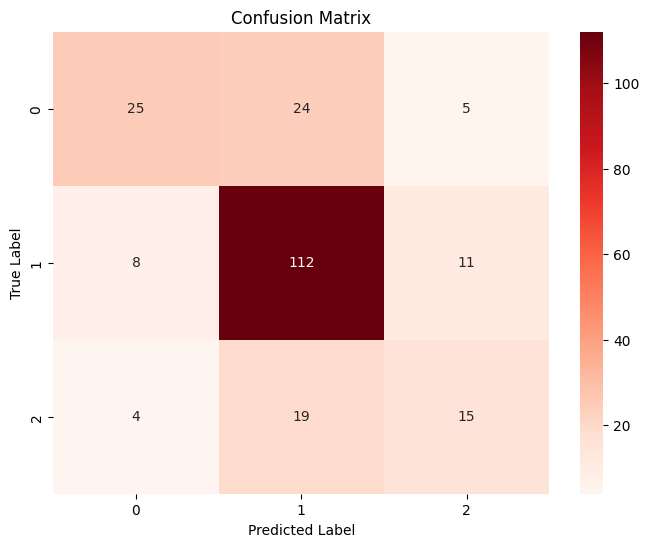

Accuracy: 0.6816143497757847
F1 Score (Class 1): 0.5891499804543282
Recall (Macro): 0.5708872123764316
Precision (Macro): 0.6273757628596338


In [27]:
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/model_saves/epoch_bartlarge_B_20.0')                #XXX       #THIS
model = model.to('cuda')
dev_texts = df_dev_2['text'].tolist()                                                                                   #XXX
dev_dataset = TextDataset(tokenizer, dev_texts)
dev_loader = DataLoader(dev_dataset, batch_size=4, shuffle=False)
predictions = []
for batch in tqdm(dev_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy(), probabilities[:,2].cpu().numpy()))
df_predictions_20 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight', 'prediction_2_weight'])        #THIS

df_dev_2.reset_index(drop=True, inplace=True)
df_predictions_20.reset_index(drop=True, inplace=True)
df_merged_20 = pd.concat([df_dev_2, df_predictions_20], axis=1)

#df_merged_1 = pd.concat([df_dev_2, df_predictions_1], axis=1)                                      #XXX                        #THIS #THIS
true_labels = df_merged_20['label_2']                                                                                                   #THIS
predicted_labels = df_merged_20['predicted_label']                                                                                    #THIS
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
accuracy = accuracy_score(true_labels, predicted_labels)
f1_class_1 = f1_score(true_labels, predicted_labels, average='macro')
recall_class_1 = recall_score(true_labels, predicted_labels, average='macro')
precision_class_1 = precision_score(true_labels, predicted_labels, average='macro')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Class 1): {f1_class_1}")
print(f"Recall (Macro): {recall_class_1}")
print(f"Precision (Macro): {precision_class_1}")
df_merged_20.to_csv('BartLargeB_task6_predictions_002_epoch_20.csv', index=False)

In [28]:
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large')
model = AutoModelForSequenceClassification.from_pretrained('/content/model_saves/epoch_bartlarge_B_20.0')                #XXX       #THIS
model = model.to('cuda')
test_texts = df_test['text'].tolist()                                                                                   #XXX
test_dataset = TextDataset(tokenizer, test_texts)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)
predictions = []
for batch in tqdm(test_loader, desc="Evaluating"):
    inputs = {k: v.to(model.device) for k, v in batch.items() if k != 'labels'}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)
    pred_labels = logits.argmax(1)
    predictions.extend(zip(pred_labels.cpu().numpy(), probabilities[:,0].cpu().numpy(), probabilities[:,1].cpu().numpy(), probabilities[:,2].cpu().numpy()))
df_predictions_20 = pd.DataFrame(predictions, columns=['predicted_label', 'prediction_0_weight', 'prediction_1_weight', 'prediction_2_weight'])        #THIS

Evaluating:   0%|          | 0/300 [00:00<?, ?it/s]

In [29]:
df_predictions_20

,predicted_label,prediction_0_weight,prediction_1_weight,prediction_2_weight
0,1,0.000014,0.999980,0.000006
1,2,0.000012,0.000004,0.999984
2,1,0.000005,0.999992,0.000002
3,2,0.000005,0.000004,0.999990
4,1,0.000010,0.999983,0.000008
...,...,...,...,...
1195,1,0.003162,0.996749,0.000089
1196,2,0.000005,0.000004,0.999991
1197,1,0.000004,0.999994,0.000002
1198,1,0.000005,0.999992,0.000003


In [30]:
df_predictions_20.to_csv('BartLarge_task6_predictions_B_epoch20.csv', index=False)